## Lecture 4 
## Advanced NumPy

#### Timing Code Snippets: ``%timeit`` and ``%time``

We saw the ``%timeit`` line-magic and ``%%timeit`` cell-magic in the introduction to magic functions in Magic Commands; it can be used to time the repeated execution of snippets of code:

In [1]:
%timeit sum(range(100))

2.6 µs ± 184 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [2]:
import random
L = [random.random() for i in range(100000)]
%timeit L.sort()

5.51 ms ± 588 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
import random
L = [random.random() for i in range(100000)]
print("sorting an unsorted list:")
%time L.sort()

sorting an unsorted list:
Wall time: 32 ms


In [4]:
print("sorting an already sorted list:")
%time L.sort()

sorting an already sorted list:
Wall time: 6 ms


In [5]:
import random
L = [random.random() for i in range(100000)]
print("sorting an unsorted list:")
%time L.sort()

print("sorting an already sorted list:")
%time L.sort()

sorting an unsorted list:
Wall time: 61 ms
sorting an already sorted list:
Wall time: 10 ms


## About better perfomance of a ndarray
Performance of a list

In [6]:
import time 
import sys 
 
mul = 1024*1024*128 
 
a = time.time() 
x = [0]*mul 
b = time.time() 
print("Creation_Time: "+str(b-a)+" sec") 
 
size = sys.getsizeof(x) 
print("Size_on_RAM: "+str(size/(1024.0*1024.0))+" MB") 

a = time.time() 
for i in x: 
    x[i]=5 
b = time.time() 
print("Write_Time_taken: "+str(b-a)+" sec") 
 
a = time.time() 
max(x)
b = time.time() 
print("Read_Time_taken: "+str(b-a)+" sec") 

Creation_Time: 1.3792686462402344 sec
Size_on_RAM: 1024.0000610351562 MB
Write_Time_taken: 23.357865810394287 sec
Read_Time_taken: 5.301488399505615 sec


Performance of ndarray

In [7]:
import time 
import sys 
import numpy as np 
 
mul = 1024*1024*128 
 
a = time.time() 
x = np.zeros(mul,dtype=np.int8) 
b = time.time() 
print("Creation_Time: "+str(b-a)+" sec") 
 
size=sys.getsizeof(x) 
print("Size_on_RAM: "+str(size/(1024.0*1024.0))+" MB") 
     
a = time.time() 
for i in x: 
    x[i] = 5
b = time.time()
print("Write_Time_taken: "+str(b-a)+" sec") 
 
a = time.time() 
x[:] = 6
b = time.time() 
print("Write_Time_taken_numpy: "+str(b-a)+" sec")     
    
a = time.time() 
for i in x: 
    pass 
b=time.time() 
print("Read_Time_taken: "+str(b-a)+" sec") 

a = time.time() 
max(x)
b=time.time() 
print("Read_Time_taken_core_function: "+str(b-a)+" sec") 

a = time.time() 
np.max(x)
b=time.time() 
print("Read_Time_taken_numpy: "+str(b-a)+" sec") 


Creation_Time: 0.5412249565124512 sec
Size_on_RAM: 128.00009155273438 MB
Write_Time_taken: 57.478015661239624 sec
Write_Time_taken_numpy: 0.06800413131713867 sec
Read_Time_taken: 30.080263376235962 sec
Read_Time_taken_core_function: 26.89891767501831 sec
Read_Time_taken_numpy: 0.3412177562713623 sec


## Introducing UFuncs

For many types of operations, NumPy provides a convenient interface into just this kind of statically typed, compiled routine. This is known as a *vectorized* operation.
This can be accomplished by simply performing an operation on the array, which will then be applied to each element.
This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.


In [13]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

And ufunc operations are not limited to one-dimensional arrays–they can also act on multi-dimensional arrays as well:

In [14]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

## Exploring NumPy's UFuncs

Ufuncs exist in two flavors: *unary ufuncs*, which operate on a single input, and *binary ufuncs*, which operate on two inputs.
We'll see examples of both these types of functions here.

### Array arithmetic

NumPy's ufuncs feel very natural to use because they make use of Python's native arithmetic operators.
The standard addition, subtraction, multiplication, and division can all be used:

In [15]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


In [6]:
5+x

array([11, 11, 11, ..., 11, 11, 11], dtype=int8)

In [7]:
x

array([6, 6, 6, ..., 6, 6, 6], dtype=int8)

There is also a unary ufunc for negation, and a ``**`` operator for exponentiation, and a ``%`` operator for modulus:

In [16]:
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


In addition, these can be strung together however you wish, and the standard order of operations is respected:

In [17]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

Each of these arithmetic operations are simply convenient wrappers around specific functions built into NumPy; for example, the ``+`` operator is a wrapper for the ``add`` function:

In [18]:
np.add(x, 2)

array([2, 3, 4, 5])

The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|

Additionally there are Boolean/bitwise operators; we will explore a bit later.

### Absolute value

Just as NumPy understands Python's built-in arithmetic operators, it also understands Python's built-in absolute value function:

In [26]:
x = np.array([-2, -1, 0, 1, 2])
%timeit abs(x)

947 ns ± 2.83 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


The corresponding NumPy ufunc is ``np.absolute``, which is also available under the alias ``np.abs``:

In [29]:
%timeit np.absolute(x)

1 µs ± 4.76 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [27]:
%timeit np.abs(x)

1.01 µs ± 6.88 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


This ufunc can also handle complex data, in which the absolute value returns the magnitude
$$r =\mid{a+b·j}\mid = \sqrt{a^2+b^2}$$


In [32]:
x = np.array([3 - 4j, 4 + 3j, 2 - 0j, 0 + 1j])
np.abs(x)

array([5., 5., 2., 1.])

### Trigonometric functions

NumPy provides a large number of useful ufuncs, and some of the most useful for the data scientist are the trigonometric functions.
We'll start by defining an array of angles:

In [45]:
theta = np.linspace(0, np.pi, 3)

Now we can compute some trigonometric functions on these values:

In [51]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.           1.5707963268 3.1415926536]
sin(theta) =  [0.0000000000e+00 1.0000000000e+00 1.2246467991e-16]
cos(theta) =  [ 1.0000000000e+00  6.1232339957e-17 -1.0000000000e+00]
tan(theta) =  [ 0.0000000000e+00  1.6331239353e+16 -1.2246467991e-16]


In [52]:
print("sin(theta) = ", np.array(list(map(int,np.sin(theta)))))
print("cos(theta) = ", np.array(list(map(int,np.cos(theta)))))
print("tan(theta) = ", np.array(list(map(int,np.tan(theta)))))

sin(theta) =  [0 1 0]
cos(theta) =  [ 1  0 -1]
tan(theta) =  [                0 16331239353195370                 0]


The values are computed to within machine precision, which is why values that should be zero do not always hit exactly zero.
Inverse trigonometric functions are also available:

In [53]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.5707963268  0.            1.5707963268]
arccos(x) =  [3.1415926536 1.5707963268 0.          ]
arctan(x) =  [-0.7853981634  0.            0.7853981634]


### Exponents and logarithms

Another common type of operation available in a NumPy ufunc are the exponentials:

In [54]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.7182818285  7.3890560989 20.0855369232]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


The inverse of the exponentials, the logarithms, are also available.
The basic ``np.log`` gives the natural logarithm; if you prefer to compute the base-2 logarithm or the base-10 logarithm, these are available as well.


For othen bases use formula $$ \log_a b= \frac{\log_c b}{\log_c a}$$

In [57]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.           0.6931471806 1.3862943611 2.302585093 ]
log2(x)  = [0.           1.           2.           3.3219280949]
log10(x) = [0.           0.3010299957 0.6020599913 1.          ]


There are also some specialized versions that are useful for maintaining precision with very small input:

In [58]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.           0.0010005002 0.0100501671 0.1051709181]
log(1 + x) = [0.           0.0009995003 0.0099503309 0.0953101798]


When ``x`` is very small, these functions give more precise values than if the raw ``np.log`` or ``np.exp`` were to be used.

## Advanced Ufunc Features

Many NumPy users make use of ufuncs without ever learning their full set of features.
We'll outline a few specialized features of ufuncs here.

In [61]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


This can even be used with array views. For example, we can write the results of a computation to every other element of a specified array:

In [62]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


In [ ]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

This can even be used with array views. For example, we can write the results of a computation to every other element of a specified array:

y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

### Aggregates

For binary ufuncs, there are some interesting aggregates that can be computed directly from the object.
For example, if we'd like to *reduce* an array with a particular operation, we can use the ``reduce`` method of any ufunc.
A reduce repeatedly applies a given operation to the elements of an array until only a single result remains.

For example, calling ``reduce`` on the ``add`` ufunc returns the sum of all elements in the array:

In [65]:
x = np.arange(1, 6)
np.add.reduce(x)

15

Similarly, calling ``reduce`` on the ``multiply`` ufunc results in the product of all array elements:

In [66]:
np.multiply.reduce(x)

120

If we'd like to store all the intermediate results of the computation, we can instead use ``accumulate``:

In [67]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15], dtype=int32)

In [68]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120], dtype=int32)

Note that for these particular cases, there are dedicated NumPy functions to compute the results (``np.sum``, ``np.prod``, ``np.cumsum``, ``np.cumprod``), which we'll explore a bit later.

### Outer products

Finally, any ufunc can compute the output of all pairs of two different inputs using the ``outer`` method.
This allows you, in one line, to do things like create a multiplication table:

In [69]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

## Ufuncs: Learning More

More information on universal functions (including the full list of available functions) can be found on the [NumPy (http://www.numpy.org)](http://www.numpy.org) and [SciPy (http://www.scipy.org)](http://www.scipy.org) documentation websites.


# Aggregations: Min, Max, and Everything In Between

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [71]:
L = np.random.random(100)
sum(L)

49.0664915754531

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

In [72]:
np.sum(L)

49.06649157545311

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [73]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

409 ms ± 6.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.66 ms ± 27.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Be careful, though: the ``sum`` function and the ``np.sum`` function are not identical, which can sometimes lead to confusion!
In particular, their optional arguments have different meanings, and ``np.sum`` is aware of multiple array dimensions, as we will see in the following section.

## Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [74]:
min(big_array), max(big_array)

(1.302046582107863e-06, 0.9999990917964706)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [75]:
np.min(big_array), np.max(big_array)

(1.302046582107863e-06, 0.9999990917964706)

In [76]:
%timeit min(big_array)
%timeit np.min(big_array)

207 ms ± 4.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.75 ms ± 75.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [77]:
print(big_array.min(), big_array.max(), big_array.sum())

1.302046582107863e-06 0.9999990917964706 499726.7295402766


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [78]:
M = np.random.random((3, 4))
print(M)

[[0.5738555135 0.8359446691 0.3095497281 0.7074468468]
 [0.7898927766 0.8037310775 0.3332019982 0.6351115995]
 [0.4617629339 0.4680784671 0.1993043632 0.5059405251]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [79]:
M.sum()

6.623820498661281

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

In [80]:
M.min(axis=0)

array([0.4617629339, 0.4680784671, 0.1993043632, 0.5059405251])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [81]:
M.max(axis=1)

array([0.8359446691, 0.8037310775, 0.5059405251])

### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value.
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |



The formula for the mean value is
$${\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}={\frac {1}{n}}(x_{1}+\ldots +x_{n})$$

The formula for the sample standard deviation is 
$$S={\sqrt {{\frac {1}{n}}\sum _{i=1}^{n}\left(x_{i}-{\bar {x}}\right)^{2}}}$$

# Computation on Arrays: Broadcasting

We saw in the previous section how NumPy's universal functions can be used to *vectorize* operations and thereby remove slow Python loops.
Another means of vectorizing operations is to use NumPy's *broadcasting* functionality.
Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

## Introducing Broadcasting

Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [91]:
import numpy as np

In [92]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [93]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value ``5`` into the array ``[5, 5, 5]``, and adds the results.
The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [94]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [95]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the one-dimensional array ``a`` is stretched, or broadcast across the second dimension in order to match the shape of ``M``.

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [96]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [97]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Just as before we stretched or broadcasted one value to match the shape of the other, here we've stretched *both* ``a`` and ``b`` to match a common shape, and the result is a two-dimensional array!
The geometry of these examples is visualized in the following figure.

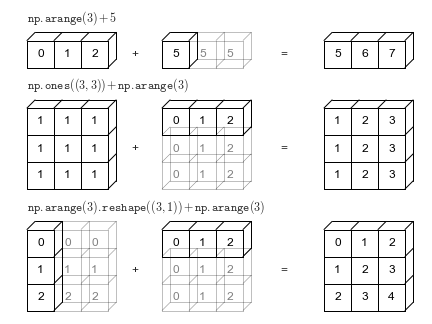

The light boxes represent the broadcasted values: again, this extra memory is not actually allocated in the course of the operation, but it can be useful conceptually to imagine that it is.

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.



### <p style="color:red">To make this rules clear, we start next class with the examples</p>